<a href="https://colab.research.google.com/github/aboubacardiallo050/ODC/blob/main/TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy matplotlib


--- Problème TSP avec 30 villes ---
[Greedy] Общая стоимость : 562.11 | Время : 0.0009 sec


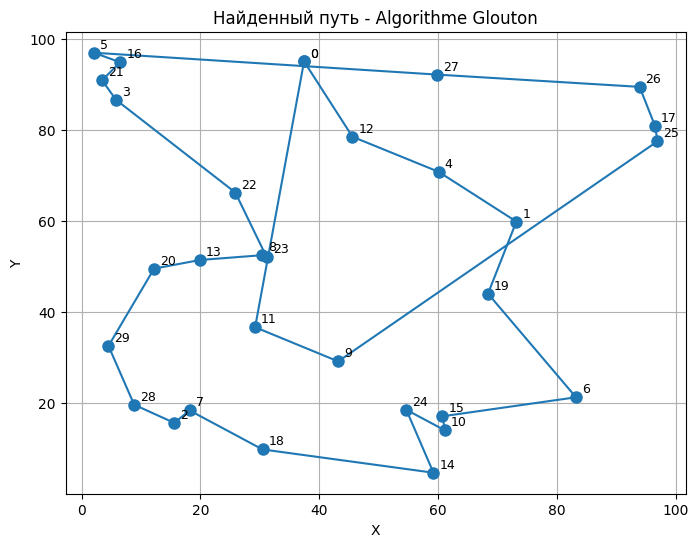

[FACOC] Общая стоимость : 455.06 | Время : 2.2981 sec


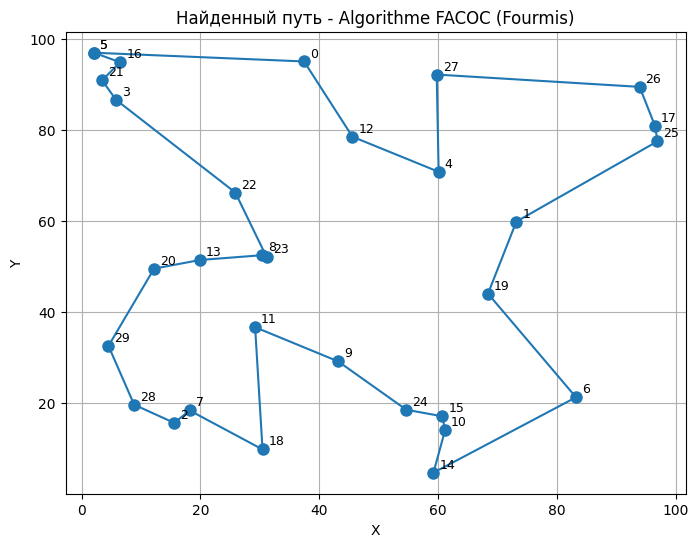

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# --------- Генерация матрицы расстояний ---------
def generate_distance_matrix(n, seed=42):
    np.random.seed(seed)
    coords = np.random.rand(n, 2) * 100  # Координаты города
    matrix = np.linalg.norm(coords[:, None, :] - coords[None, :, :], axis=2)
    return matrix, coords

# --------- Algorithme Glouton (Greedy) ---------
def tsp_greedy(matrix, start=0):
    n = len(matrix)
    visited = [False] * n
    path = [start]
    total_cost = 0
    current = start
    visited[start] = True

    for _ in range(n - 1):
        next_city = np.argmin([matrix[current][j] if not visited[j] else float('inf') for j in range(n)])
        total_cost += matrix[current][next_city]
        path.append(next_city)
        visited[next_city] = True
        current = next_city

    total_cost += matrix[current][start]
    path.append(start)
    return path, total_cost

# --------- Algorithme FACOC (ACO) ---------
def tsp_facoc(matrix, n_ants=30, n_iter=100, alpha=1, beta=5, evaporation=0.5, Q=100):
    n = len(matrix)
    pheromone = np.ones((n, n))
    best_path = None
    best_cost = float('inf')

    def path_cost(path):
        return sum(matrix[path[i]][path[i+1]] for i in range(len(path) - 1)) + matrix[path[-1]][path[0]]

    for iteration in range(n_iter):
        all_paths = []
        all_costs = []

        for _ in range(n_ants):
            path = [random.randint(0, n - 1)]
            while len(path) < n:
                i = path[-1]
                probs = []
                for j in range(n):
                    if j not in path:
                        tau = pheromone[i][j] ** alpha
                        eta = (1.0 / matrix[i][j]) ** beta
                        probs.append((j, tau * eta))
                total = sum(prob for _, prob in probs)
                r = random.uniform(0, total)
                s = 0
                for city, prob in probs:
                    s += prob
                    if s >= r:
                        path.append(city)
                        break
            cost = path_cost(path)
            all_paths.append(path)
            all_costs.append(cost)
            if cost < best_cost:
                best_cost = cost
                best_path = path

        # Испарение и обновление - Évaporation et mise à jour
        pheromone *= (1 - evaporation)
        for path, cost in zip(all_paths, all_costs):
            for i in range(n):
                a, b = path[i], path[(i + 1) % n]
                pheromone[a][b] += Q / cost
                pheromone[b][a] += Q / cost

    best_path.append(best_path[0])
    return best_path, best_cost

# --------- Просмотр пути - Visualisation du chemin ---------
def plot_path(path, coords, title=""):
    x = [coords[i][0] for i in path]
    y = [coords[i][1] for i in path]
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', markersize=8)
    for i, city in enumerate(path):
        plt.text(coords[city][0]+1, coords[city][1]+1, str(city), fontsize=9)
    plt.title(title)
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# --------- Comparaison des deux algorithmes ---------
def compare_algorithms(n=30):
    matrix, coords = generate_distance_matrix(n)

    print(f"\n--- Problème TSP avec {n} villes ---")

    # Glouton
    start = time.time()
    greedy_path, greedy_cost = tsp_greedy(matrix)
    end = time.time()
    print(f"[Greedy] Общая стоимость : {greedy_cost:.2f} | Время : {end - start:.4f} sec")
    plot_path(greedy_path, coords, "Найденный путь - Algorithme Glouton")

    # FACOC
    start = time.time()
    facoc_path, facoc_cost = tsp_facoc(matrix)
    end = time.time()
    print(f"[FACOC] Общая стоимость : {facoc_cost:.2f} | Время : {end - start:.4f} sec")
    plot_path(facoc_path, coords, "Найденный путь - Algorithme FACOC (Fourmis)")

# --------- Exécution ---------
if __name__ == "__main__":
    compare_algorithms(n=30)

TSP Algorithm Comparator

Enter number of cities (minimum 2): 100

Comparing algorithms for 100 cities

Greedy Algorithm:
Path Cost: 969.22
Execution Time: 0.0074 seconds


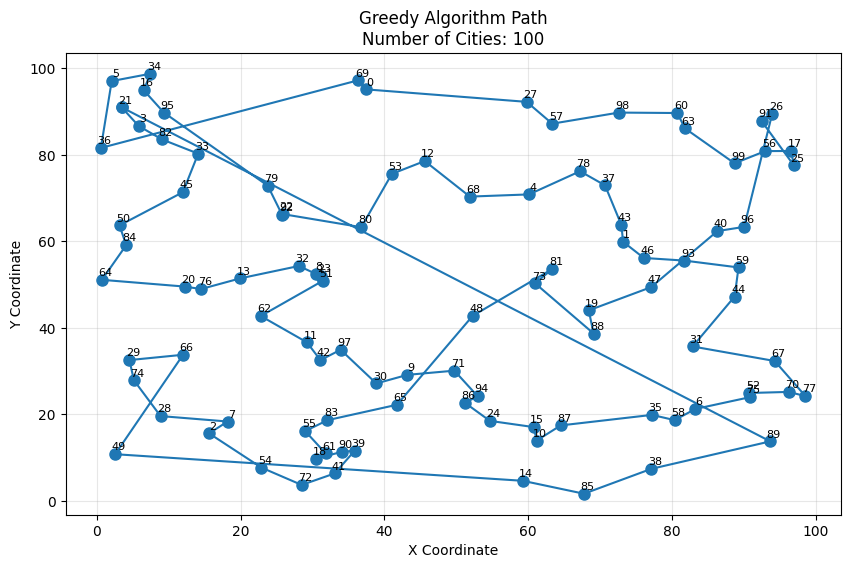


ACO Algorithm:
Path Cost: 826.69
Execution Time: 21.6365 seconds


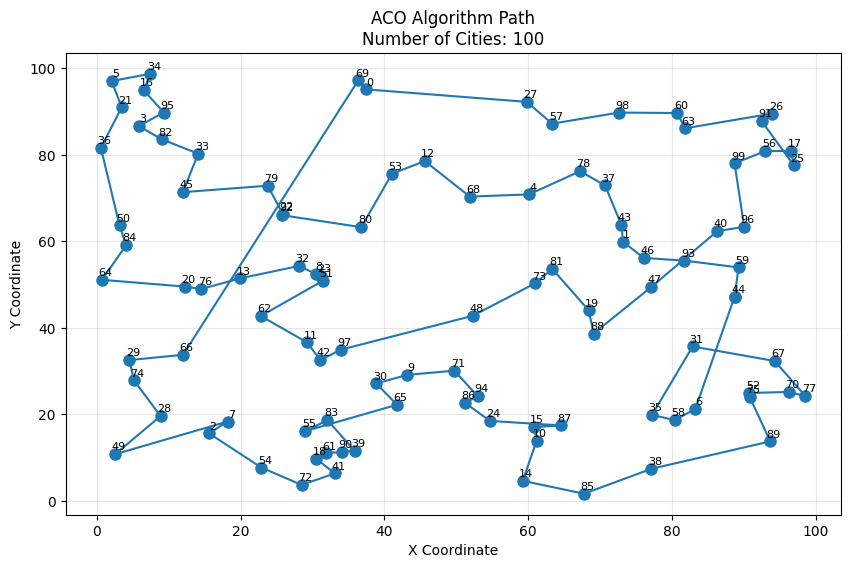

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# --------- Distance matrix generation ---------
def generate_distance_matrix(n, seed=42):
    np.random.seed(seed)
    coords = np.random.rand(n, 2) * 100
    matrix = np.linalg.norm(coords[:, None, :] - coords[None, :, :], axis=2)
    return matrix, coords

# --------- Improved Greedy Algorithm ---------
def tsp_greedy(matrix, start=None):
    n = len(matrix)
    if start is None:
        start = random.randint(0, n-1)  # Random starting point

    visited = [False] * n
    path = [start]
    total_cost = 0
    current = start
    visited[start] = True

    for _ in range(n - 1):
        # Find the nearest unvisited city
        next_city = np.argmin([matrix[current][j] + 1e-10 if not visited[j] else float('inf') for j in range(n)])
        total_cost += matrix[current][next_city]
        path.append(next_city)
        visited[next_city] = True
        current = next_city

    total_cost += matrix[current][start]
    path.append(start)
    return path, total_cost

# --------- Optimized ACO Algorithm ---------
def tsp_acof(matrix, n_ants=30, n_iter=100, alpha=1, beta=5, evaporation=0.5, Q=100):
    n = len(matrix)
    pheromone = np.ones((n, n))
    best_path = None
    best_cost = float('inf')

    def path_cost(path):
        return sum(matrix[path[i]][path[i+1]] for i in range(len(path)-1)) + matrix[path[-1]][path[0]]

    for iteration in range(n_iter):
        all_paths = []
        all_costs = []

        for _ in range(n_ants):
            start = random.randint(0, n-1)
            path = [start]
            visited = {start}

            while len(path) < n:
                i = path[-1]
                probs = []

                for j in range(n):
                    if j not in visited:
                        tau = pheromone[i][j] ** alpha
                        eta = (1.0 / (matrix[i][j] + 1e-10)) ** beta  # Avoid division by zero
                        probs.append((j, tau * eta))

                if not probs:  # Handle edge case
                    break

                total = sum(prob for _, prob in probs)
                r = random.uniform(0, total)
                s = 0
                for city, prob in probs:
                    s += prob
                    if s >= r:
                        path.append(city)
                        visited.add(city)
                        break

            if len(path) == n:  # Only consider complete paths
                cost = path_cost(path)
                all_paths.append(path)
                all_costs.append(cost)

                if cost < best_cost:
                    best_cost = cost
                    best_path = path.copy()

        # Pheromone update
        pheromone *= (1 - evaporation)
        for path, cost in zip(all_paths, all_costs):
            for i in range(n):
                a, b = path[i], path[(i+1) % n]
                pheromone[a][b] += Q / cost
                pheromone[b][a] += Q / cost

    if best_path is not None:
        best_path.append(best_path[0])
    return best_path, best_cost

# --------- Visualization ---------
def plot_path(path, coords, title=""):
    plt.figure(figsize=(10, 6))
    x = [coords[i][0] for i in path]
    y = [coords[i][1] for i in path]
    plt.plot(x, y, 'o-', markersize=8, linewidth=1.5)

    # Annotate cities with offset
    for i, city in enumerate(path[:-1]):
        plt.text(coords[city][0]+0.5, coords[city][1]+0.5, str(city),
                 fontsize=8, ha='center', va='bottom')

    plt.title(f"{title}\nNumber of Cities: {len(coords)}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True, alpha=0.3)
    plt.show()

# --------- Algorithm Comparison ---------
def compare_algorithms(n):
    matrix, coords = generate_distance_matrix(n)

    print(f"\n{'='*40}")
    print(f"Comparing algorithms for {n} cities")
    print(f"{'='*40}")

    # Greedy Algorithm
    start_time = time.time()
    greedy_path, greedy_cost = tsp_greedy(matrix)
    greedy_time = time.time() - start_time
    print(f"\nGreedy Algorithm:")
    print(f"Path Cost: {greedy_cost:.2f}")
    print(f"Execution Time: {greedy_time:.4f} seconds")
    plot_path(greedy_path, coords, "Greedy Algorithm Path")

    # ACO Algorithm
    start_time = time.time()
    aco_path, aco_cost = tsp_acof(matrix)
    aco_time = time.time() - start_time
    print(f"\nACO Algorithm:")
    print(f"Path Cost: {aco_cost:.2f}")
    print(f"Execution Time: {aco_time:.4f} seconds")
    plot_path(aco_path, coords, "ACO Algorithm Path")

# --------- Main Program ---------
if __name__ == "__main__":
    print("TSP Algorithm Comparator")
    print("=" * 25)

    while True:
        try:
            n = int(input("\nEnter number of cities (minimum 2): "))
            if n >= 2:
                break
            print("Please enter a number ≥ 2!")
        except ValueError:
            print("Invalid input! Please enter an integer.")

    compare_algorithms(n)